In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family


# style 설정은 꼭 폰트설정 위에서 합니다.
# style 에 폰트 설정이 들어있으면 한글폰트가 초기화 되어 한글이 깨집니다.
plt.style.use("seaborn")
# 폰트설정
plt.rc("font", family=get_font_family())

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# air 전처리

In [3]:
import glob
glob.glob("data/*대기오염도.csv")

['data\\미세먼지_PM10__월별_도시별_대기오염도.csv',
 'data\\미세먼지_PM2.5__월별_도시별_대기오염도.csv',
 'data\\아황산가스_월별_도시별_대기오염도.csv',
 'data\\오존_월별_도시별_대기오염도.csv',
 'data\\이산화질소_월별_도시별_대기오염도.csv',
 'data\\일산화탄소_월별_도시별_대기오염도.csv']

In [4]:
a = pd.read_csv("data\\미세먼지_PM10__월별_도시별_대기오염도.csv", encoding="cp949")
a["종류"]="미세먼지 PM10"

In [5]:
b = pd.read_csv("data\\미세먼지_PM2.5__월별_도시별_대기오염도.csv", encoding="cp949")
b["종류"]="미세먼지 PM2.5"

In [6]:
c = pd.read_csv("data\\아황산가스_월별_도시별_대기오염도.csv", encoding="cp949")
c["종류"]="아황산가스"

In [7]:
d = pd.read_csv("data\\오존_월별_도시별_대기오염도.csv", encoding="cp949")
d["종류"]="오존"

In [8]:
e = pd.read_csv("data\\이산화질소_월별_도시별_대기오염도.csv", encoding="cp949")
e["종류"]="이산화질소"

In [9]:
f = pd.read_csv("data\\일산화탄소_월별_도시별_대기오염도.csv", encoding="cp949")
f["종류"]="일산화탄소"

In [10]:
frames = [a,b,c,d,e,f]
df_air = pd.concat(frames)

In [11]:
del df_air["구분(2)"]    # 세부주소 삭제
df_air = df_air.drop(labels=0,axis=0)    # 총계 제거
df_air

,구분(1),2019.01,2019.02,2019.03,2019.04,2019.05,2019.06,2019.07,2019.08,2019.09,...,2020.04,2020.05,2020.06,2020.07,2020.08,2020.09,2020.10,2020.11,2020.12,종류
1,서울특별시,66,57,69,41,52,29,26,25,21,...,44,35,36,21,23,19,33,42,42,미세먼지 PM10
2,부산광역시,48,48,51,40,47,32,26,30,24,...,36,32,27,18,31,24,30,31,33,미세먼지 PM10
3,대구광역시,57,54,54,40,46,32,26,26,23,...,39,38,35,22,25,25,33,40,38,미세먼지 PM10
4,인천광역시,62,55,67,43,51,29,31,30,28,...,39,31,32,21,24,20,34,39,39,미세먼지 PM10
5,광주광역시,53,57,63,43,50,40,29,31,27,...,38,31,31,15,22,21,31,32,33,미세먼지 PM10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,경상남도,-,-,-,-,-,-,-,-,-,...,0.4,0.3,0.3,0.3,0.2,0.3,0.3,0.3,0.4,일산화탄소
168,경상남도,0.5,0.5,0.5,0.4,0.4,0.4,0.4,0.4,0.4,...,0.4,0.4,0.4,0.3,0.3,0.4,0.4,0.4,0.5,일산화탄소
169,제주특별자치도,0.5,0.5,0.4,0.3,0.3,0.3,0.3,0.3,0.2,...,0.4,0.4,0.3,0.2,0.2,0.3,0.3,0.3,0.4,일산화탄소
170,제주특별자치도,0.3,0.3,0.3,0.3,0.3,0.2,0.2,0.2,0.1,...,0.3,0.3,0.2,0.2,0.2,0.2,0.2,0.3,0.3,일산화탄소


In [12]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1026 entries, 1 to 171
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   구분(1)    1026 non-null   object
 1   2019.01  1026 non-null   object
 2   2019.02  1026 non-null   object
 3   2019.03  1026 non-null   object
 4   2019.04  1026 non-null   object
 5   2019.05  1026 non-null   object
 6   2019.06  1026 non-null   object
 7   2019.07  1026 non-null   object
 8   2019.08  1026 non-null   object
 9   2019.09  1026 non-null   object
 10  2019.10  1026 non-null   object
 11  2019.11  1026 non-null   object
 12  2019.12  1026 non-null   object
 13  2020.01  1026 non-null   object
 14  2020.02  1026 non-null   object
 15  2020.03  1026 non-null   object
 16  2020.04  1026 non-null   object
 17  2020.05  1026 non-null   object
 18  2020.06  1026 non-null   object
 19  2020.07  1026 non-null   object
 20  2020.08  1026 non-null   object
 21  2020.09  1026 non-null   object
 22  2

In [13]:
month_list = df_air.columns[1:25]
for month in month_list:
    df_air[month] = pd.to_numeric(df_air[month], errors='coerce')

In [14]:
df_air = pd.pivot_table(df_air, index=('구분(1)', '종류'), aggfunc='mean')
df_air = df_air.reset_index()
df_air = df_air.rename(columns={'구분(1)':'지역'})
df_air

,지역,종류,2019.01,2019.02,2019.03,2019.04,2019.05,2019.06,2019.07,2019.08,...,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,2020.09,2020.10,2020.11,2020.12
0,강원도,미세먼지 PM10,55.769231,49.444444,57.333333,38.055556,44.947368,28.473684,25.368421,25.894737,...,36.789474,39.000000,29.222222,35.333333,16.875000,18.263158,18.555556,27.555556,32.909091,34.533333
1,강원도,미세먼지 PM2.5,31.923077,30.055556,37.055556,17.277778,22.473684,16.789474,14.444444,13.894737,...,20.842105,18.789474,14.500000,18.000000,8.684211,10.200000,9.235294,13.882353,19.133333,23.000000
2,강원도,아황산가스,0.003385,0.003056,0.002944,0.002222,0.002421,0.002053,0.001947,0.002105,...,0.002368,0.002526,0.002333,0.002389,0.002211,0.002158,0.002278,0.002278,0.002632,0.002737
3,강원도,오존,0.022154,0.027778,0.039389,0.040944,0.056263,0.043684,0.033895,0.029474,...,0.035632,0.043684,0.039444,0.045167,0.027632,0.022611,0.029278,0.026722,0.023632,0.022947
4,강원도,이산화질소,0.018462,0.014056,0.012667,0.010222,0.009611,0.007778,0.006474,0.006526,...,0.010526,0.008667,0.007000,0.006889,0.005667,0.006211,0.005889,0.009056,0.012474,0.014526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,충청북도,미세먼지 PM2.5,45.800000,44.750000,47.333333,22.666667,27.250000,24.363636,15.666667,17.166667,...,26.083333,22.166667,18.363636,20.090909,9.750000,11.083333,11.916667,20.583333,25.416667,29.583333
98,충청북도,아황산가스,0.004900,0.004333,0.003583,0.003167,0.003167,0.002636,0.002583,0.002500,...,0.003091,0.003182,0.003083,0.002909,0.002833,0.002750,0.002833,0.002917,0.003000,0.003333
99,충청북도,오존,0.014800,0.022167,0.034917,0.036083,0.049333,0.042727,0.029917,0.027667,...,0.032583,0.042833,0.039667,0.044091,0.027083,0.020500,0.027167,0.023750,0.019500,0.016917
100,충청북도,이산화질소,0.027800,0.023333,0.019500,0.015500,0.014333,0.011273,0.009167,0.009417,...,0.015083,0.011900,0.009000,0.008909,0.007833,0.007250,0.009333,0.013750,0.017167,0.019818


In [15]:
df_air = df_air.melt(id_vars=['지역', '종류'], var_name='날짜', value_name='수치')

In [16]:
df_air["날짜"] = [data[:4] for data in df_air["날짜"]]

In [17]:
df_air = df_air.groupby(["지역", "종류", "날짜"]).mean()

In [18]:
df_air = df_air.reset_index()
df_air.columns = ['시도명', '종류', '시점', '대기오염 수치']

In [19]:
df_air.to_csv('air.csv', index=False)

In [20]:
pd.read_csv("air.csv")

,시도명,종류,시점,대기오염 수치
0,강원도,미세먼지 PM10,2019,37.054471
1,강원도,미세먼지 PM10,2020,29.757446
2,강원도,미세먼지 PM2.5,2019,20.787793
3,강원도,미세먼지 PM2.5,2020,16.956441
4,강원도,아황산가스,2019,0.002492
...,...,...,...,...
199,충청북도,오존,2020,0.027834
200,충청북도,이산화질소,2019,0.016506
201,충청북도,이산화질소,2020,0.013268
202,충청북도,일산화탄소,2019,0.456124


# air + waste dataframe(df)

In [21]:
import glob
glob.glob("waste/*.csv")

['waste\\waste_2019.csv', 'waste\\waste_2020.csv']

In [22]:
df_a = pd.read_csv('waste\\waste_2019.csv')
df_a

,시도명,배출방식,시점,사업장배출시설폐기물수,사업장생활폐기물수,생활폐기물수
0,강원도,기타,2019,217.2,84.2,16.4
1,강원도,매립,2019,628.8,115.4,1127.6
2,강원도,소각,2019,160.8,62.0,836.0
3,강원도,재활용,2019,11334.8,507.6,1752.6
4,경기도,기타,2019,3278.4,496.8,74.6
...,...,...,...,...,...,...
63,충청남도,재활용,2019,74522.8,636.0,2268.6
64,충청북도,기타,2019,1248.2,135.8,0.2
65,충청북도,매립,2019,908.0,2.2,658.0
66,충청북도,소각,2019,2201.4,146.8,1364.8


In [23]:
df_b = pd.read_csv('waste\\waste_2020.csv')
df_b

,시도명,배출방식,시점,사업장생활폐기물수,사업장배출시설폐기물수,생활폐기물수
0,강원도,기타,2020,50140.8,98363.4,6586.4
1,강원도,매립,2020,32602.6,245895.4,369244.6
2,강원도,소각,2020,20117.0,74140.4,322714.0
3,강원도,재활용,2020,212098.6,4083822.2,636822.0
4,경기도,기타,2020,550924.8,1767479.2,28812.2
...,...,...,...,...,...,...
63,충청남도,재활용,2020,381190.4,25566060.0,634348.0
64,충청북도,기타,2020,13972.8,522273.4,1151.4
65,충청북도,매립,2020,3077.4,467990.6,221174.2
66,충청북도,소각,2020,40787.0,892614.6,547695.0


In [24]:
df_waste = pd.concat([df_a, df_b])
df_waste['시점'] = df_waste['시점'].astype(str)

In [25]:
df = df_waste.merge(df_air, how='outer')
df

,시도명,배출방식,시점,사업장배출시설폐기물수,사업장생활폐기물수,생활폐기물수,종류,대기오염 수치
0,강원도,기타,2019,217.2,84.2,16.4,미세먼지 PM10,37.054471
1,강원도,기타,2019,217.2,84.2,16.4,미세먼지 PM2.5,20.787793
2,강원도,기타,2019,217.2,84.2,16.4,아황산가스,0.002492
3,강원도,기타,2019,217.2,84.2,16.4,오존,0.031794
4,강원도,기타,2019,217.2,84.2,16.4,이산화질소,0.010849
...,...,...,...,...,...,...,...,...
811,충청북도,재활용,2020,3749176.2,305257.6,548888.6,미세먼지 PM2.5,21.468434
812,충청북도,재활용,2020,3749176.2,305257.6,548888.6,아황산가스,0.003015
813,충청북도,재활용,2020,3749176.2,305257.6,548888.6,오존,0.027834
814,충청북도,재활용,2020,3749176.2,305257.6,548888.6,이산화질소,0.013268


In [26]:
df.to_csv('air_waste.csv')

- 사업장배출시설폐기물 : 산업공정 등 배출시설의 설치나 운영 등과 관련하여 배출되는 폐기물.
- 사업장생활폐기물 : 사업장에서 배출시설 등의 운영에 관계되지 아니한 폐기물로 사무실, 대형매장, 백화점, 식당 등에서 배출되는 폐기물.
- 생활폐기물 : 가정에서 발생되는 폐기물.

# 시각화

## 폐기물 수

### 시도별

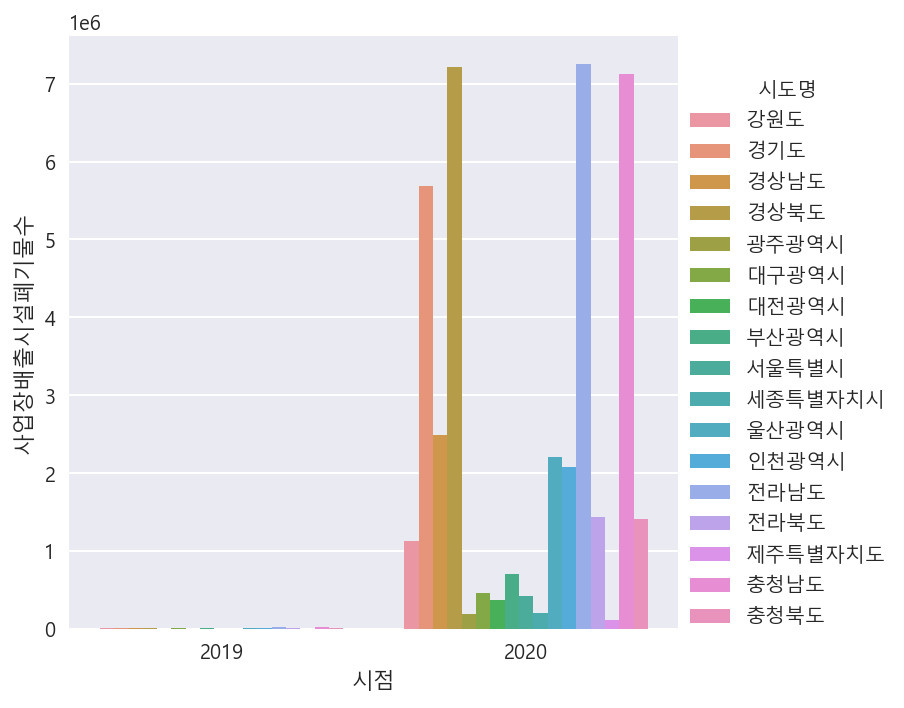

In [27]:
# 시도별 사업장배출시설폐기물수
sns.catplot(data=df, x="시점", y="사업장배출시설폐기물수", kind="bar", hue="시도명", ci=None)

# 경기, 경북, 전남, 충남의 사업장배출시설폐기물 비중이 높음

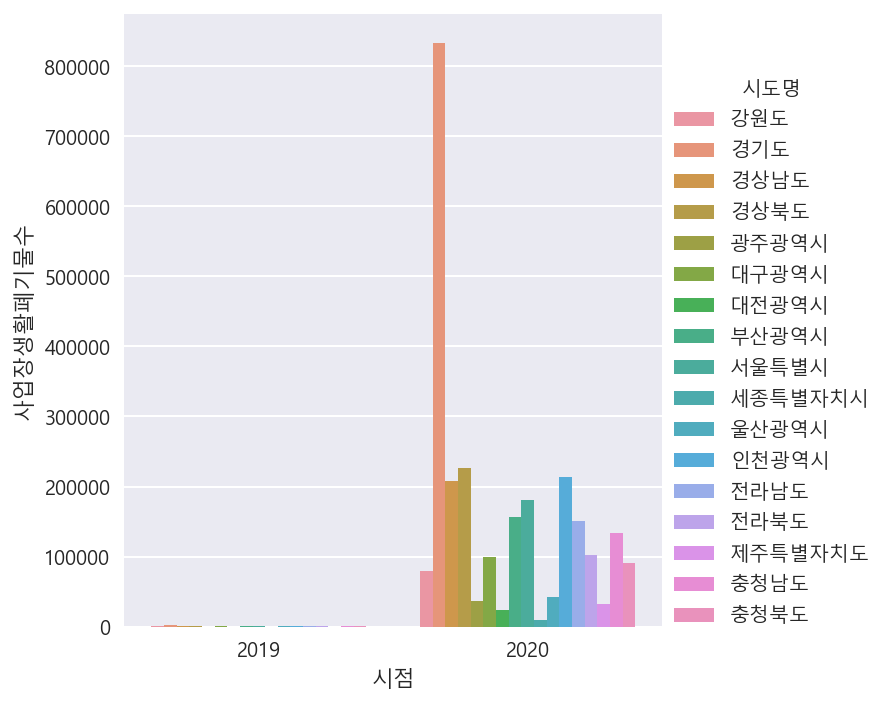

In [28]:
# 시도별 사업장생활폐기물수
sns.catplot(data=df, x="시점", y="사업장생활폐기물수", kind="bar", hue="시도명", ci=None)

# 경기도의 사업장생활폐기물 비중이 압도적으로 높음

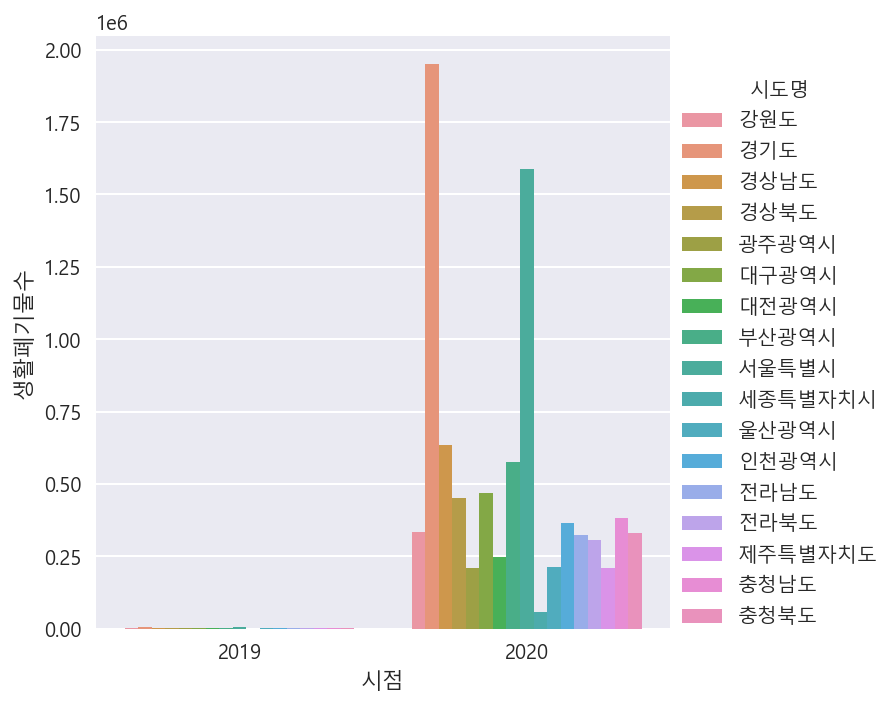

In [29]:
# 시도별 생활폐기물수
sns.catplot(data=df, x="시점", y="생활폐기물수", kind="bar", hue="시도명", ci=None)

# 경기, 서울의 생활폐기물 비중이 높음

### 배출방식별

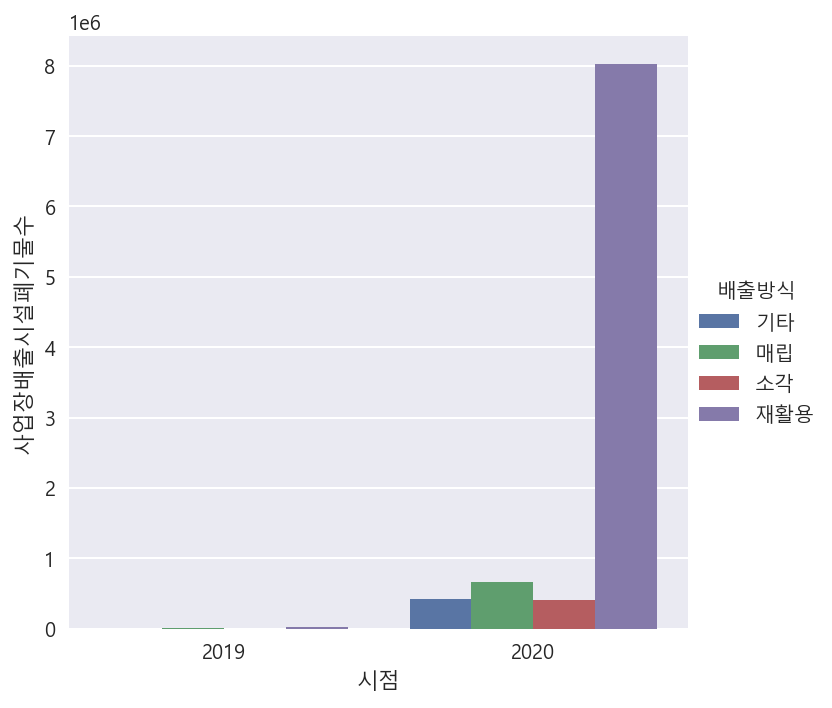

In [30]:
# 배출방식별 사업장배출시설폐기물수
sns.catplot(data=df, x="시점", y="사업장배출시설폐기물수", kind="bar", hue="배출방식", ci=None)

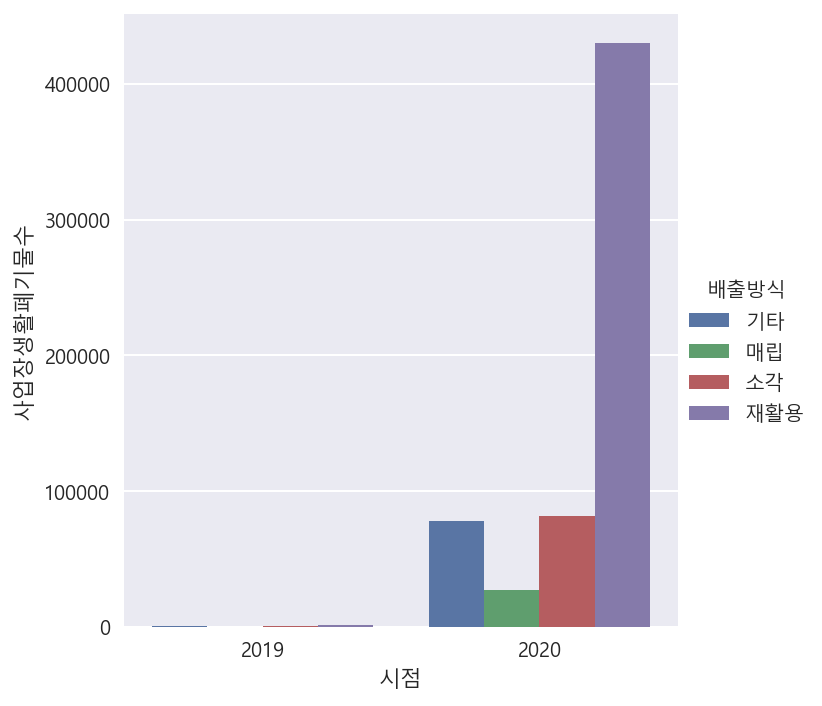

In [31]:
# 배출방식별 사업장생활폐기물수
sns.catplot(data=df, x="시점", y="사업장생활폐기물수", kind="bar", hue="배출방식", ci=None)

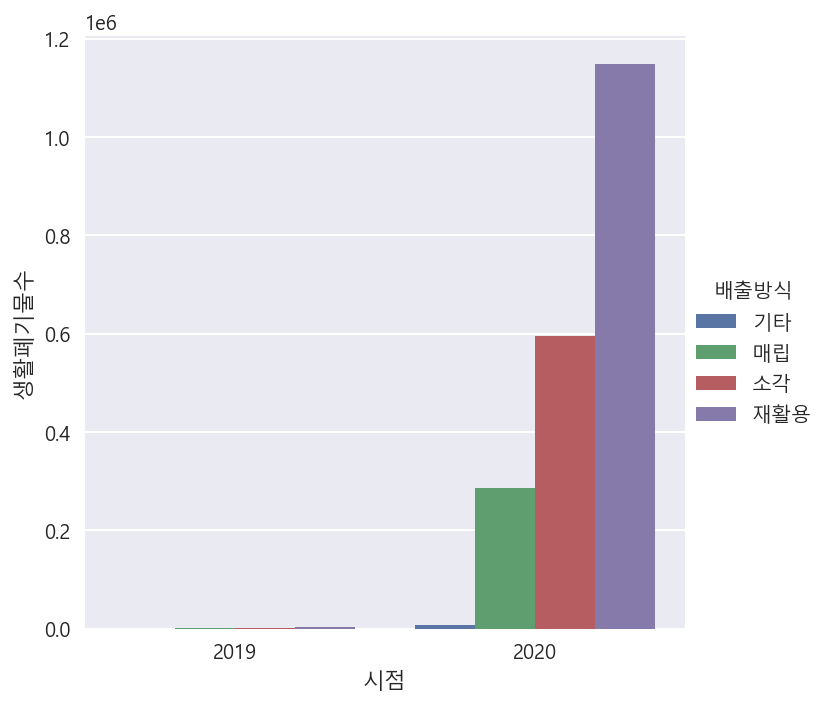

In [32]:
# 배출방식별 생활폐기물수
sns.catplot(data=df, x="시점", y="생활폐기물수", kind="bar", hue="배출방식", ci=None)

# 생활폐기물이 사업장폐기물에 비해 재활용 비중이 적음

## 대기오염

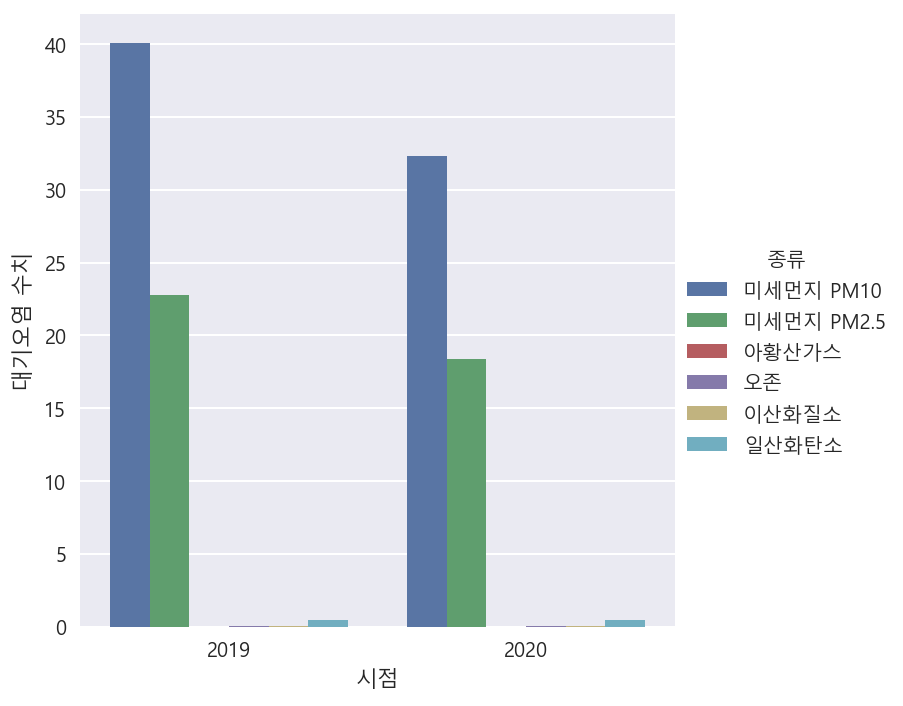

In [33]:
# 종류별 대기오염 수치
sns.catplot(data=df, x="시점", y="대기오염 수치", kind="bar", hue="종류", ci=None)

# 미세먼지 수치가 전년도에 비해 낮아짐
# 아황산가스 ~ 일산화탄소는 따로 비교 필요

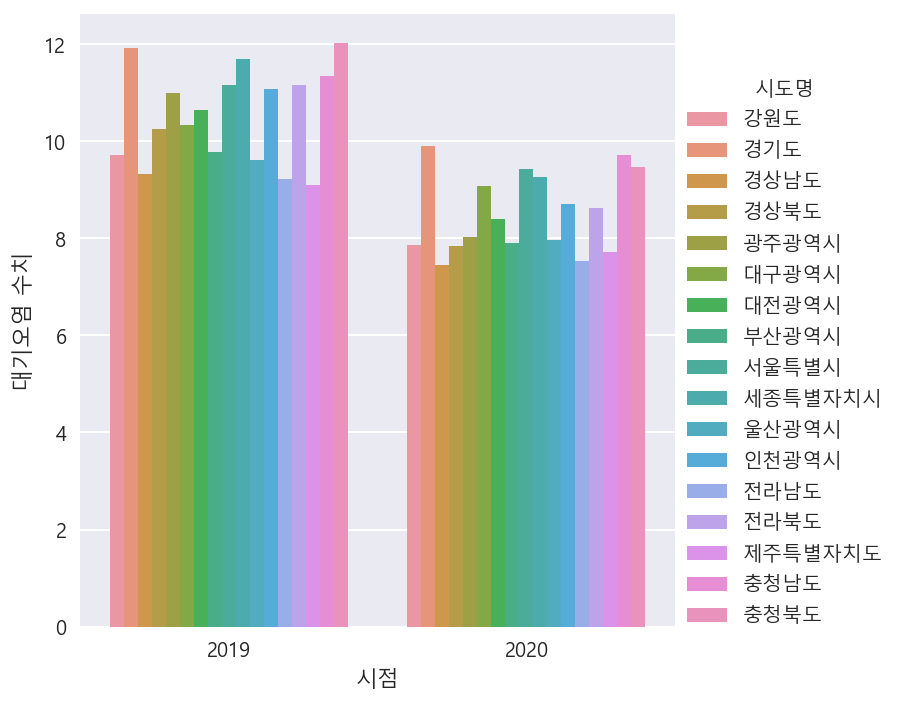

In [34]:
# 시도별 대기오염 수치
sns.catplot(data=df, x="시점", y="대기오염 수치", kind="bar", hue="시도명", ci=None)

# 전년도에 비해 대체로 대기오염 수치가 낮아짐

- 시도별로 폐기물 비중이 높은 곳이 어디인지 알 수 있다
    - 사업장배출시설폐기물 : 경기, 경북, 전남, 충남
    - 사업장생활폐기물 : 경기
    - 생활폐기물 : 경기, 서울
    
- 위의 세 종류의 폐기물 모두, 재활용 비중이 가장 높다는 걸 알 수 있다

- 2019년에 비해 2020년의 폐기물 총량이 압도적으로 증가했다

- 2019년에 비해 2020년의 대기질이 대체적으로 좋아졌다